In [2]:
import pandas as pd

# make sure you imported the kaggle dataset and have it on the same directory as this. 
file = "wiki_movie_plots_deduped.csv"

df = pd.read_csv(file)


In [4]:
# This cell takes awhile to run

selected_col = df[["Genre", "Plot"]] # columns from the csv that we want to focus on

selected_genres = ["comedy", "drama", "adventure", "fantasy", 
                  "horror", "mystery", "romance", 
                 "action", "thriller", "western"] # select 10 genres

# Initialize an empty dictionary
movie = {}

# Iterate through the DataFrame rows
for index, row in selected_col.iterrows():
    genre = row['Genre']
    plot = row['Plot']

    # Check if genre exists in selected_genres
    if genre in selected_genres: 
        if genre in movie:
            # Append the movie plot to the existing value
            # I did < 250 to ensure that every genre has less than 250 movies. This is because we had too much
            # text so I had to shorten it
            if len(movie[genre]) < 250: 
                movie[genre].append(plot)
        else:
            # Create a new key-value pair
            movie[genre] = [plot]


            
# Right now, the result of movie looks like this:
# movie = {comedy: [movie1, movie2, movie3,...,movie250], action: [movie1, movie2, movie3,...,movie250]} and so on

# So the value of the key-value pairs is just an list of the movies

In [7]:
text = " ".join(movie["horror"])
print(text)
# stopwords


White-haired Dr. Jekyll has secretly locked himself in his laboratory administering himself with a vial of formula. He slumps into his chair with his head on his chest. Slowly, as the drug takes effect, a dark-haired, taloned beast now appears in the chair. After repeated use, Jekyll's evil alter ego emerges at will, causing Jekyll to murder his sweetheart's father. The evil personality scuttles back to the laboratory only to discover that the antidote is finished and that he will be as Mr. Hyde forever. A burly policeman breaks down Jekyll's door to find that the kindly doctor is dead after taking poison. Dr. Henry Jekyll (King Baggot) sends a note to his fiancée, Alice (Jane Gail), and her father (Matt B. Snyder) to say that instead of accompanying them to the opera, he must give more time to his charity patients. At Jekyll’s practice, his friends Dr. Lanyon (Howard Crampton) and Utterson (William Sorrel), a lawyer, ridicule him for what they consider his dangerous research. Alice an

In [8]:
# print total amount of words in entire text corpus that we are analyzing

total_words = 0
for key in movie: 
    for mov in movie[key]: 
        total_words += len(mov.split(' '))
print(total_words)

849167


In [8]:

import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\itoka\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\itoka\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\itoka\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\itoka\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\itoka\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

True

In [6]:
import re

from nltk.corpus import stopwords
stoplist = stopwords.words('english')

# add important missing stuff to stop word list
stoplist.extend([".", ",", "?", "could", "would", "“", "”", "’", ";", "!","much", "like", "one", "many", "though", "without", "upon"])

def get_tokens(type): 
    alltext = " ".join(movie[type])

    alltext = re.sub("\n", " ", alltext)
    alltext = re.sub(r"\[.*?\]", "", alltext)
    
    alltokens = nltk.word_tokenize(alltext)
    # if we want to use stopwords
    # allcontenttokens = [w for w in alltokens if w.lower() not in stoplist]
    # return allcontenttokens
    
    return alltokens



In [20]:
gen = ["comedy", "drama", "adventure", "fantasy", 
                 "horror", "mystery", "romance", 
                 "action", "thriller", "western"]
for item in gen: 
    m = get_tokens(item)
    print(item)
    token = len(m)
    types = len(set(m))
    ratio = token//types
    print(f"Tokens: {token}")
    print(f"Types: {types}")
    print(f"Type:Token ratio: 1: {ratio}")
    print("")

comedy
Tokens: 58844
Types: 7769
Type:Token ratio: 1: 7

drama
Tokens: 59047
Types: 7975
Type:Token ratio: 1: 7

adventure
Tokens: 88227
Types: 10682
Type:Token ratio: 1: 8

fantasy
Tokens: 135720
Types: 13515
Type:Token ratio: 1: 10

horror
Tokens: 137142
Types: 12682
Type:Token ratio: 1: 10

mystery
Tokens: 85089
Types: 9850
Type:Token ratio: 1: 8

romance
Tokens: 100631
Types: 10955
Type:Token ratio: 1: 9

action
Tokens: 123329
Types: 12642
Type:Token ratio: 1: 9

thriller
Tokens: 133435
Types: 12914
Type:Token ratio: 1: 10

western
Tokens: 69272
Types: 7913
Type:Token ratio: 1: 8



In [9]:

# prints out average length of movies

average_length = 0 
for key in movie:
    for mov in movie[key]:
        length = len(mov.split(' '))
        average_length += length

print(average_length/2454)

346.03382233088837


In [11]:
# prints out the total amount of movies we are analyzing

total_movies = 0
for key in movie:
    total_movies += len(movie[key])
print(total_movies)

2454


In [12]:
# So to get the text corpus for a particular genre, do something like: 

# text = movie["comedy"] 
# because this 'text' variable is a list (because the value from the key-value pair is a list)
# we want to make it a string
# so do something like new_text = "".join(text)
# get rid of stop words, normalize, lemmatize, etc, and make visualization from there


text = movie["comedy"]
new_text = "".join(text)
# get stop words
# tokenize/lemmatize depending on what your doing

In [13]:
print(len(movie))

10


In [14]:
print(len(movie['fantasy']))

204


In [15]:
# Running simliar code in a slightly different way to grab metadata

# Initialize an empty dictionary
movieData = {}

# Iterate through the DataFrame rows
for index, row in selected_col.iterrows():
    genre = row['Genre']
    plot = row['Plot']

    if genre != "unknown": 
        if genre in movieData:
            # Append the movie plot to the existing value
            if len(movieData[genre]) < 250: 
                movieData[genre].append(plot)
        else:
            # Create a new key-value pair
            movieData[genre] = [plot]

In [16]:
for key in movieData: 
    print(key)

western
comedy
short
short action/crime western
short film
biographical
drama
adventure
short fantasy
silent sports
horror
crime
drama, horror
historical drama
fantasy drama
biographical drama
documentary drama
fantasy
adventure serial
epic
historical
comedy short
comedy, western
biography
action adventure
western drama
short comedy
comedy–drama
romantic drama
mystery
crime drama
romance
sexual hygiene/exploitation film
comedy drama
war drama
spy
romantic comedy
propaganda
ww1 propaganda
biopic
animated series
drama romance
melodrama
period drama
swashbuckler
romance drama
drama, adventure
crime comedy
documentary
comedy western
fantasy, family
war
comedy, adventure
fantasy, adventure
thriller
dramatic comedy
romantic comedy/drama
mystery, thriller
crime thriller
american football
fantasy, romance
comedy, horror, mystery
semi-staged documentary
biblical drama
race film
comedy adventure
romance, drama
comedy, romance
crime, drama
musical
musical comedy
operetta
comedy mystery
detective


In [18]:
print(len(movie))

10


In [25]:
# entire_text of all 2454 movies

entire_text = ""
for key in movie: 
    entire_text += " ".join(movie[key])

f = open("textcorpus.txt", "w", encoding="utf-8")
f.write(entire_text)
f.close

<function TextIOWrapper.close()>

In [32]:

import gensim
from gensim.models import Word2Vec

bigmodel = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300-SLIM.bin.gz", binary=True)
print("big model loaded!")

big model loaded!


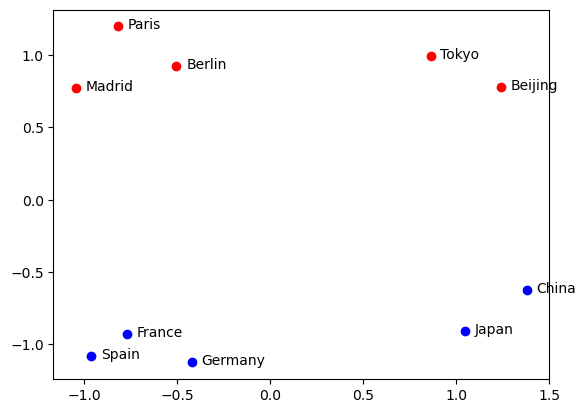

In [34]:
# %matplotlib inline
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA

# from gensim.models import Word2Vec


# wordpairs = {"Comedy":"scary", "Drama":"laugh",  "Adventure":"Germany", "Fantasy":"China", "Horror":"Japan",
#             "Mystery":"scary", "Romance":"laugh",  "Action":"Germany", "Thriller":"China", "Western":"Japan"}

# Go get the word vectors for these words and 
# then store them so you can use them later on.
# vecwords = []  
# vecs = []     
# for k,v in wordpairs.items():
#     kvec = bigmodel[k]
#     vvec = bigmodel[v]
#     vecs.append(kvec)
#     vecwords.append(k)
#     vecs.append(vvec)
#     vecwords.append(v)
    
# PCA is a way to project multiple dimensions down to 
# fewer dimensions, which we are doing here so we can 
# visualize the word vectors.
# pca = PCA(n_components=2, whiten=True)
# vectors2d = pca.fit(vecs).transform(vecs)


# This is just some ugly matplotlib code for plotting
# the 2-D vectors and visualizing them with different colors.
# i = 2
# for point, word in zip(vectors2d, vecwords):
#     if i%2 == 0:
#         plt.scatter(point[0], point[1], c='r')
#     else:
#         plt.scatter(point[0], point[1], c='b')
#     i += 1
    
#     plt.annotate(
#             word, 
#             xy=(point[0], point[1]),
#             xytext=(7, 6),
#             textcoords='offset points',
#             ha='left' ,
#             va='top',
#             size="medium"
#             )